In [19]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

rng = np.random

In [2]:
lr = 0.01
n_epochs = 1000
dis_step = 50    # unit: epoch

In [5]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]    # 17

In [10]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

0.197178720303


In [12]:
pred = tf.add(tf.multiply(X, W), b)

In [13]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [14]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.078703754 W= 0.226712 b= 0.966078
Epoch: 0100 cost= 0.078507967 W= 0.228072 b= 0.956288
Epoch: 0150 cost= 0.078334697 W= 0.229352 b= 0.947082
Epoch: 0200 cost= 0.078181319 W= 0.230556 b= 0.938423
Epoch: 0250 cost= 0.078045510 W= 0.231688 b= 0.930279
Epoch: 0300 cost= 0.077925295 W= 0.232753 b= 0.922619
Epoch: 0350 cost= 0.077818848 W= 0.233754 b= 0.915414
Epoch: 0400 cost= 0.077724628 W= 0.234696 b= 0.908638
Epoch: 0450 cost= 0.077641189 W= 0.235582 b= 0.902266
Epoch: 0500 cost= 0.077567294 W= 0.236415 b= 0.896271
Epoch: 0550 cost= 0.077501856 W= 0.237199 b= 0.890633
Epoch: 0600 cost= 0.077443913 W= 0.237936 b= 0.88533
Epoch: 0650 cost= 0.077392593 W= 0.238629 b= 0.880343
Epoch: 0700 cost= 0.077347130 W= 0.239281 b= 0.875652
Epoch: 0750 cost= 0.077306852 W= 0.239895 b= 0.871239
Epoch: 0800 cost= 0.077271186 W= 0.240472 b= 0.86709
Epoch: 0850 cost= 0.077239588 W= 0.241014 b= 0.863186
Epoch: 0900 cost= 0.077211574 W= 0.241524 b= 0.859516
Epoch: 0950 cost= 0.077186763 

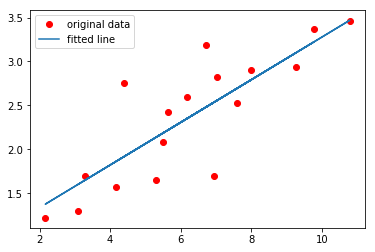

In [20]:
# launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        # log
        if (epoch+1) % dis_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b)
    print "optimization finished."
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost =", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    
    plt.plot(train_X, train_Y, 'ro', label='original data')
    plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label='fitted line')
    plt.legend()
    plt.show()

In [16]:
%connect_info

{
  "stdin_port": 57189, 
  "ip": "127.0.0.1", 
  "control_port": 57190, 
  "hb_port": 57191, 
  "signature_scheme": "hmac-sha256", 
  "key": "757bd8fe-f2c2e79de98c181ff67beba9", 
  "kernel_name": "", 
  "shell_port": 57187, 
  "transport": "tcp", 
  "iopub_port": 57188
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-19737de2-72d7-49a4-b4dc-89a3f7535901.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
